# Wordcloud

#### Preprocessing

Untuk melakukan preprocessing, kita memerlukan library *re* , yaitu library Python yang khusus mengolah Regex. Regex adalah suatu ekspresi yang menunjukkan pola tertentu pada huruf, kata, atau tanda baca dalam suatu teks.

Untuk memahami pola yang ada di Regex, kita bisa memanfaatkan cheatsheet berikut:

https://cheatography.com/mutanclan/cheat-sheets/python-regular-expression-regex/

In [ ]:
import re

Kita juga perlu library NLTK. NLTK banyak digunakan dalam bidang Natural Language Processing (NLP) dan mendukung berbagai bahasa. Selain NLTK, ada juga spacy yang menawarkan fitur serupa. Di sini, kita memanfaatkan NLTK untuk menghilangkan stopword (kata yang sering muncul, tetapi tidak mengandung informasi penting, misalnya *konjungsi* dan, atau, tetapi, melainkan,...)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
idn_stopwords = stopwords.words('indonesian')
idn_stopwords.extend(
    ['ae','ah','aing','aj','aja','ak','anjir','ayo','banget','belom','bener2','bgt','biar','bikin','blm','btw','bnyk','byk','cuman','d','dah','dapet','deh','deket',
     'dg','dgn','disana','dll','doang','dpt','dr','drpd','duar','duarr','duarrr','duluan','e', 'eh','emang','emg','engga','g','ga','gak','gaada','gamau','gara',
     'gara2','gatau','gegara','gimana','gini','gtu','gitu','gk','gmn','gt','gue','gw','hah', 'haha','jd','jdi','jg','jgn','kagak','ka','kaga','kah','kak','kalo',
     'kali','karna','kau','kayak','kayaknya','kek','kl','klian','klo','knp','kpd','ku','krn','krna','kyk','la','lg','lgsg','lha','lho','lo','loh','lu','ma','mah','mending',
     'min','mo','mrk','msh','na','nder','nge','ngga','nggak','ni','nih','ntar','nya','org','pakai','pake','pd','pdhl','salah','sama2','sampe','sbg','sdh',
     'sebenernya','sat','set','satset','si','sih','situ','skrg','sm','spt','tau','tau2','tbtb','tb2','td','tdk','tiba2','tp','tpi','ttg','trus','trs','tsb',
     'tu','tuh','udah','udh','utk','xixi','w','wes','wkwk','wkwkw','wkwkwk','wkwkwkwk','wow','x','y','yg','ya','yaa','yaaa','yah','ygy','yo','yuk'])
idn_stopwords.extend(
    ['ra','mbak','mas','kui','ki','po','ora','iki','karo','opo','sek','sik','arep','og','wae','ngono','tenan','ben','iso','kudu','sing','nek','dadi','pa','iku','saiki'])

In [ ]:
def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub(r'\#\w+',' ',text) # Remove every hashtag
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text
    
def remove_nonaplhanumeric(text):
  text = re.sub('&amp;', ' ', text)
  text = re.sub('[^0-9a-zA-Z,.?!]+', ' ', text) 
  text = re.sub('  +', ' ', text)
  return text

def remove_stopword(text):
  text = re.sub('[.,!?]','',text)
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')]) #Mengganti stopword dengan ''
  text = re.sub('  +', ' ', text)
  text = text.title()
  text = text.strip() #Menghapus spasi atau newline di awal dan akhir kalimat yang tidak diperlukan
  return text

In [ ]:
def fixSingkatan(text):
  text = re.sub(r'\b(aj|ae|aja)\b', 'saja', text)
  text = re.sub(r'\b(ak|gue|gw)\b','aku', text)
  text = re.sub(r'\b(belom|blm)\b', 'belum', text)
  text = re.sub(r'\b(bgt|bngt)\b', 'banget', text)
  text = re.sub(r'\b(bnyk|byk)\b', 'banyak', text)
  text = re.sub(r'\b(dlm)\b', 'dalam', text)
  text = re.sub(r'\b(dr)\b', 'dari', text)
  text = re.sub(r'\b(dg|dgn)\b','dengan',text )
  text = re.sub(r'\b(dpt|dapet)\b', 'dapat', text)
  text = re.sub(r'\b(duar+)\b', 'duar', text)
  text = re.sub(r'\b(emg|emang)\b', 'memang', text)
  text = re.sub(r'\b(gt|gtu)\b', 'gitu', text)
  text = re.sub(r'\b(gatau)\b', 'tidak tau', text)
  text = re.sub(r'\b(gaada)\b', 'tidak ada', text)
  text = re.sub(r'\b(gamau)\b', 'tidak mau', text)
  text = re.sub(r'\b(gimana|gmn)\b', 'bagaimana', text)
  text = re.sub(r'\b(jgn)\b', 'jangan', text)
  text = re.sub(r'\b(jgn2|jangan2)\b', 'jangan jangan', text)
  text = re.sub(r'\b(jd|jdi)\b', 'jadi', text)
  text = re.sub(r'\b(karna|krn|krna)\b', 'karena', text)
  text = re.sub(r'\b(kyk|kek)\b', 'kayak', text)
  text = re.sub(r'\b(kl|klo|kalo)\b', 'kalau', text)
  text = re.sub(r'\b(klian)\b', 'kalian', text)
  text = re.sub(r'\b(knp)\b', 'kenapa', text)
  text = re.sub(r'\b(kpd)\b', 'kepada', text)
  text = re.sub(r'\b(lg)\b', 'lagi', text)
  text = re.sub(r'\b(lgsg)\b', 'langsung', text)
  text = re.sub(r'\b(mrk)\b', 'mereka', text)
  text = re.sub(r'\b(pd)\b', 'pada', text)
  text = re.sub(r'\b(pdhl)\b', 'padahal', text)
  text = re.sub(r'\b(pake)\b', 'pakai', text)
  text = re.sub(r'\b(org)\b', 'orang', text)
  text = re.sub(r'\b(org2)\b', 'orang orang', text)
  text = re.sub(r'\b(sbg)\b', 'sebagai', text)
  text = re.sub(r'\b(skrg)\b', 'sekarang', text)
  text = re.sub(r'\b(sm)\b', 'sama', text)
  text = re.sub(r'\b(spt)\b', 'seperti', text)
  text = re.sub(r'\b(dah|sdh|udh|udah)\b', 'sudah', text)
  text = re.sub(r'\b(tp|tpi)\b', 'tapi', text)
  text = re.sub(r'\b(tiba2|tbtb|tb2)\b', 'tiba tiba', text)
  text = re.sub(r'\b(td|tdi)\b', 'tadi', text)
  text = re.sub(r'\b(tdk|g|ga|gak|gk|engga|enggak|ngga|nggak|kaga|kagak)\b', 'tidak', text)
  text = re.sub(r'\b(trus|trs)\b', 'terus', text)
  text = re.sub(r'\b(tsb)\b', 'tersebut', text)
  text = re.sub(r'\b(ttg)\b', 'tentang', text)
  text = re.sub(r'\b(utk)\b', 'untuk', text)
  text = re.sub(r'\b(ya+h*)\b', 'ya', text)
  text = re.sub(r'\b(yg)\b', 'yang', text)
  return text

Keterangan tambahan:
- `re.sub()` digunakan untuk mengganti kemunculan pola tertentu dengan sebuah string yang diinginkan
- `re.split()` digunakan untuk memisahkan string dengan pemisah kata yang memenuhi pola tersebut
- `re.findall()` digunakan untuk mencari semua kata yang memenuhi pola tersebut

In [ ]:
def preprocess(text):
  text = text.lower() # Mengecilkan semua hurufnya dahulu agar lebih mudah
  text = remove_unnecessary_char(text)
  text = preprocess_tweet(text) 
  text = remove_nonaplhanumeric(text)
  return text

In [ ]:
df["cleanTweet_stopwords_included"] = df["tweet"].apply(preprocess)

In [ ]:
# Apply remove_stopword untuk membuat kolom 'cleanTweet_stopwords_removed' berikut
df['cleanTweet_stopwords_removed'] = df["cleanTweet_stopwords_included"].apply(remove_stopword)

Bisa kita lihat perbandingannya

In [ ]:
pd.options.display.max_colwidth = 295 # Melihat keseluruhan isi tweet
df[["tweet","cleanTweet_stopwords_included","cleanTweet_stopwords_removed"]].sample(10)

,tweet,cleanTweet_stopwords_included,cleanTweet_stopwords_removed
24493,Ini Makna Desain Patung Garuda Raksasa Di Istana Negara Ibu Kota Baru https://t.co/1HjImhWR84,ini makna desain patung garuda raksasa di istana negara ibu kota baru,Makna Desain Patung Garuda Raksasa Istana Negara Kota
15899,Kemenkeu Klaim Aset Negara Nganggur Rp300 T Bisa untuk Ibu Kota Baru https://t.co/rf1bvW4xME,kemenkeu klaim aset negara nganggur rp300 t bisa untuk ibu kota baru,Kemenkeu Klaim Aset Negara Nganggur Rp300 T Kota
11151,Presiden Jokowi kemah di #IbukotaNegara baru gelorakan #SemangatNusantara https://t.co/rTDFC6irKm,presiden jokowi kemah di baru gelorakan,Presiden Jokowi Kemah Gelorakan
427,Hunian hotel mulia meningkat karena IKN Nusantara Ekonomi Indonesia Melonjak https://t.co/Yl6i2YEzct,hunian hotel mulia meningkat karena ikn nusantara ekonomi indonesia melonjak,Hunian Hotel Mulia Meningkat Ikn Nusantara Ekonomi Indonesia Melonjak
17354,Rachmat Gobel mendukung penuh pembangunan Ibu Kota Negara yang baru. Ada tiga hal penting kenapa pembangunan ini harus dilakukan. https://t.co/A441cZCHRP,rachmat gobel mendukung penuh pembangunan ibu kota negara yang baru. ada tiga hal penting kenapa pembangunan ini harus dilakukan.,Rachmat Gobel Mendukung Penuh Pembangunan Kota Negara Pembangunan
8003,#IKN membawa kemajuan untuk semua daerah. #IbukotaNegara #SemangatNusantara https://t.co/e2AqAXsR32,membawa kemajuan untuk semua daerah.,Membawa Kemajuan Daerah
8004,#IKN membawa kemajuan untuk semua daerah. #IbukotaNegara #SemangatNusantara https://t.co/bVdwy0QcGb,membawa kemajuan untuk semua daerah.,Membawa Kemajuan Daerah
4510,"(cont.) pembukaan “Ekspose Pembangunan Hijau: Mendukung Pembangunan Smart Forest City—Ibu Kota Negara (IKN) Nusantara” di Kalimantan Timur, pada Rabu, 8 Juni 2022. #GGCEkspose","cont. pembukaan ekspose pembangunan hijau mendukung pembangunan smart forest city ibu kota negara ikn nusantara di kalimantan timur, pada rabu, 8 juni 2022.",Cont Pembukaan Ekspose Pembangunan Hijau Mendukung Pembangunan Smart Forest City Kota Negara Ikn Nusantara Kalimantan Timur Rabu 8 Juni 2022
17258,"Biar bebas dari demo ! Selama ini yg sering demo daerah yg populasi penduduknya besar ! Sekalipun Ibu kota baru diisi imporan oleh warga negara china, emang rakyat bisa demo lintas laut klw di pulau jawa, semua pelabuhan² udah dijaga polisi &amp; tentara ? https://t.co/DFs97LLhLD","biar bebas dari demo ! selama ini yg sering demo daerah yg populasi penduduknya besar ! sekalipun ibu kota baru diisi imporan oleh warga negara china, emang rakyat bisa demo lintas laut klw di pulau jawa, semua pelabuhan udah dijaga polisi tentara ?",Bebas Demo Demo Daerah Populasi Penduduknya Kota Diisi Imporan Warga Negara China Rakyat Demo Lintas Laut Klw Pulau Jawa Pelabuhan Dijaga Polisi Tentara
23575,Tau Ibu kota Negara yang baru? Begini Nih desain yang pengen dibuat .. #NewIbuKotaNegara https://t.co/i9VJPy8Scs,tau ibu kota negara yang baru? begini nih desain yang pengen dibuat ..,Kota Negara Desain Pengen


#### Wordcloud Generation

Jika kita sudah melakukan cleaning pada tweet, kita bisa segera membuat wordcloud. Jangan lupa impor library yang diperlukan

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from google.colab import files

In [ ]:
text = df["cleanTweet_stopwords_removed"].to_list()
wordcloud_text = ''.join(text)

#### Memilih gambar

In [ ]:
#files.upload() adalah cara mengunggah file ke Google Colab
uploaded = files.upload() # Kalau error, coba pakai browser Chrome atau Edge
png_cloud = next(iter(uploaded))

Saving KalimantanVector.png to KalimantanVector.png


In [ ]:
png_cloud

'KalimantanVector.png'

In [ ]:
!wget https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Medium.ttf

--2022-06-29 13:14:54--  https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Medium.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/poppins/Poppins-Medium.ttf [following]
--2022-06-29 13:14:55--  https://raw.githubusercontent.com/google/fonts/main/ofl/poppins/Poppins-Medium.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158576 (155K) [application/octet-stream]
Saving to: ‘Poppins-Medium.ttf.2’

Poppins-Medium.ttf. 100%[===================>] 154.86K  --.-KB/s    in 0.008s  

2022-06-29 13:14:55 (18.9 MB/s) - ‘Poppins-Medium.ttf.2’ saved [158576/158576]



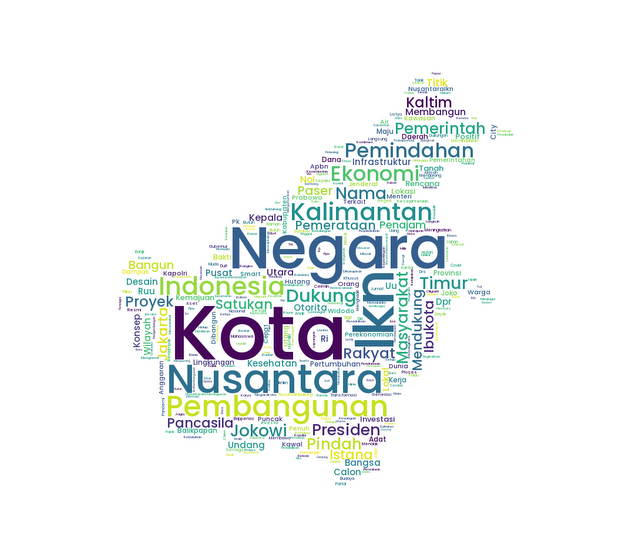

In [ ]:
mask = np.array(Image.open(png_cloud))

# Display the generated image:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        mask = mask,
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

Simpan file ke dalam bentuk gambar (gunakan format png), lalu filenya bisa kita unduh dengan mengambil dari tab yang ada di sebelah kiri

In [ ]:
wordcloud.to_file("/content/drive/Shareddrives/Kementerian Analisis Data Digital/DigiScope/6 IKN/code/IKNWordCloud.png")

# Sentiment Analysis

In [ ]:
df['cleanTweet_stopwords_included'] = df['cleanTweet_stopwords_included'].apply(fixSingkatan)

Sentiment analysis adalah salah satu jenis klasifikasi. Di sini, kita akan mengklasifikasi tweet-tweet menjadi positif, netral atau negatif. Pada percobaan kali ini, kita akan mencoba menggunakan *pretrained model* yang sudah dibuat orang lain, sehingga kita tidak perlu lagi melakukan training dan segala macam.

Library yang cukup penting adalah Transformers. Transformers adalah library yang mempermudah kita melakukan *training*, *finetuning*, dan *inferencing* model. 

In [ ]:
!pip install transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 3.5 MB/s 
     |████████████████████████████████| 596 kB 72.5 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
     |████████████████████████████████| 6.6 MB 45.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Model yang kita gunakan adalah https://huggingface.co/sahri/indonesiasentiment . Jika ingin menggunakan GPU yang memproses model puluhan hingga ratusan kali lebih cepat, jangan lupa aktifkan di kanan atas.

In [ ]:
sentiment_classifier = pipeline('text-classification', model="sahri/indonesiasentiment", device=0) #Parameter terakhir hanya jika memakai GPU Runtime. Jika menggunakan CPU, hapus device=0

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/789k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Sekarang kita, coba klasifikasikan satu-satu tweet yang sudah discraping.

In [ ]:
df_clean = df["cleanTweet_stopwords_included"]
df_clean

0         pemerintah berupaya melakukan transformasi ekonomi dalam rangka meraih visi jangka panjang untuk menjadi negara maju pada 2045. hal ini dilakukan melalui pembangunan ibu kota negara ikn baru sebagai salah satu penggerak transformasi ekonomi indonesia. ekonomi indonesia melonjak
1                                                                                                                                                                                                                                               dukung pemindahan ikn ekonomi indonesia melonjak
2                                                                                                                                                                                                                ikn cara pemerintah ratakan pembangunan dan ekonomi ekonomi indonesia melonjak 
3                                                                                                                                    

In [ ]:
from tqdm import tqdm #tqdm adalah library yang digunakan untuk melihat progress saat looping. Library ini bersifat opsional

sentiment_list = []

text_list = df_clean.tolist()

for i in tqdm(range(len(df))): 
  
  if(text_list[i] == ''):
    result = sentiment_classifier('neutral')[0]
    sentiment_list.append(result["label"])
  else:
    result = sentiment_classifier(text_list[i])[0]
    sentiment_list.append(result["label"])

print(sentiment_list[:5])

  0%|          | 9/24942 [00:00<10:26, 39.83it/s]  /usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1015: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
100%|██████████| 24942/24942 [05:00<00:00, 83.10it/s]

['positive', 'positive', 'neutral', 'neutral', 'neutral']


In [ ]:
df["sentiment"] = sentiment_list
df["sentiment"].value_counts()

neutral     12621
positive     7261
negative     5060
Name: sentiment, dtype: int64

Dengan nilai-nilai di atas, coba buat plot pie-chart dengan Matplotlib atau bawaan Pandas

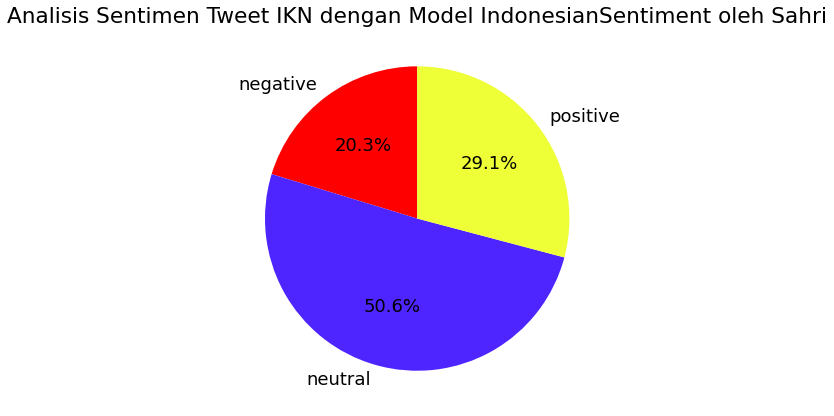

In [ ]:
colors = ['#ff0000','#4e24ff','#eeff38']
# explode = (0, 0, 0.1)

piechart = df.groupby(["sentiment"])["date"].count().plot.pie(autopct="%.1f%%", figsize=(7,7),  colors=colors, startangle=90) # Kali ini ga usah pakai explode aja
piechart.figure.patch.set_facecolor('white')
piechart.set_title('Analisis Sentimen Tweet IKN dengan Model IndonesianSentiment oleh Sahri')
piechart.yaxis.set_visible(False)
# piechart.figure.patch.set_alpha(0)

In [ ]:
piechart.figure.savefig("/content/drive/Shareddrives/Kementerian Analisis Data Digital/DigiScope/6 IKN/bahan penulisan/SentimentAnalysis.png")

Coba ambil 5 sampel dari masing-masing sentimen berlabel positif, negatif, dan netral

In [ ]:
df[["date", "tweet", "cleanTweet_stopwords_included","sentiment"]].sample(15)

,date,tweet,cleanTweet_stopwords_included,sentiment
2072,2022-06-19,PREDIKSI ane PEMILU 2024 akan CURANG n dibawa ke MK!karena kalau KALAH maka PENGUASA/REZIM jg CSnya sekarang akan KEHILANGAN SEGALA GALAnya!termasuk yg paling penting IKN n KA CEPAT!OLIGARKI sekuat tenaga mendukung REZIM agar tak kena IMBASnya!apalagi jika diAUDIT ttg HUTANG! https://t.co...,prediksi ane pemilu 2024 akan curang n dibawa ke mk!karena kalau kalah maka penguasa rezim jg csnya sekarang akan kehilangan segala galanya!termasuk yang paling penting ikn n ka cepat!oligarki sekuat tenaga mendukung rezim agar tak kena imbasnya!apalagi jika diaudit tentang hutang!,negative
473,2022-06-20,Dampak positif pembangunan IKN tenaga Kerja lokak akan terserap secara maksimalll . . Ekonomi Indonesia Melonjak,dampak positif pembangunan ikn tenaga kerja lokak akan terserap secara maksimalll . . ekonomi indonesia melonjak,neutral
7560,2022-04-17,Dukung pemerintah bangun IKN di Kalimantan #IbukotaNegara #IKN #SemangatNusantara https://t.co/qPkAMzqgBf,dukung pemerintah bangun ikn di kalimantan,neutral
11152,2022-03-15,Pemindahan IKN Mendorong Pertumbuhan Ekonomi Baru #IbukotaNegara #IKN #SemangatNusantara https://t.co/I4EcbkfgrR,pemindahan ikn mendorong pertumbuhan ekonomi baru,positive
2624,2022-06-19,IKN Nusantara untuk Indonesia maju Pancasila Satukan Nusantara https://t.co/xKk9nKPJuc,ikn nusantara untuk indonesia maju pancasila satukan nusantara,positive
21378,2022-01-16,@_SiLently0512 @dapitnih boleh ikutan gak #TolakIbukotaBaru,boleh ikutan tidak,neutral
8456,2022-04-07,"Halo #SobATRBPN, Letak Ibu Kota baru Indonesia kembali diperbincangkan setelah pemerintah mengumumkan nama Ibu Kota Negara Nusantara beberapa pekan lalu. Nah, penasaran kan letaknya ada di mana, dan kenapa sih perlu pemindahan? Simak informasi berikut ya Sob 👆🏻 @ikn_id #IKN https://t.co...","halo , letak ibu kota baru indonesia kembali diperbincangkan setelah pemerintah mengumumkan nama ibu kota negara nusantara beberapa pekan lalu. nah, penasaran kan letaknya ada di mana, dan kenapa sih perlu pemindahan? simak informasi berikut ya sob",neutral
23335,2021-08-17,"@DonAdam68 Sepertinya sesuai keinginan memindahkan ibu kota negara, karena 2024 jelas ibu kota yg baru belum siap","sepertinya sesuai keinginan memindahkan ibu kota negara, karena 2024 jelas ibu kota yang baru belum siap",negative
2743,2022-06-18,"Elemen Mahasiswa, Pemuda dan Buruh Komitmen Serukan Dukungan untuk Pembangunan IKN Nusantara https://t.co/ndo4V3OBtl","elemen mahasiswa, pemuda dan buruh komitmen serukan dukungan untuk pembangunan ikn nusantara",neutral
279,2022-06-20,@hipohan Cari modal buat IKN.,cari modal buat ikn.,neutral


In [ ]:
df[df["sentiment"] == "positive"][["date", "tweet", "cleanTweet_stopwords_included","sentiment"]].sample(5)

,date,tweet,cleanTweet_stopwords_included,sentiment
5639,2022-05-20,#IKN Nusantara dapat meningkatkan ekonomi Indonesia #IbukotaNegara #SemangatNusantara https://t.co/4f0JmdBHj9,nusantara dapat meningkatkan ekonomi indonesia,positive
22023,2021-12-20,"Ini baru memang untuk jadi Ibu kota negara Republik Indonesia Ini salah satu kotanya yang beautiful wonderful Bung Karno berkata: Ibu kota negara Indonesia harus Jakarta, harus Jakarta, harus Jakarta! https://t.co/qpYa7KTUlb","ini baru memang untuk jadi ibu kota negara republik indonesia ini salah satu kotanya yang beautiful wonderful bung karno berkata ibu kota negara indonesia harus jakarta, harus jakarta, harus jakarta!",positive
24049,2021-04-23,Bangunan ikonik di ibu kota negara yang baru. Pradesain Istana Negara karya seniman patung kenamaan Nyoman Nuarta. Sarat dengan filosofi lambang Burung Garuda sebagai pemersatu bangsa sesuai semboyan Bhinneka Tunggal Ika. @jokowi #DukungPemindahanIbuKota https://t.co/JfO1pgMOWB,bangunan ikonik di ibu kota negara yang baru. pradesain istana negara karya seniman patung kenamaan nyoman nuarta. sarat dengan filosofi lambang burung garuda sebagai pemersatu bangsa sesuai semboyan bhinneka tunggal ika.,positive
941,2022-06-20,Generasi Muda Berperan Membangun IKN #LangkahDemiBangkitkanRI https://t.co/lclHCEQ1uK,generasi muda berperan membangun ikn,positive
10439,2022-03-19,@KotaNusantara memebrikan yang terbaik #IbukotaNegara #IKN #SemangatNusantara,memebrikan yang terbaik,positive


In [ ]:
df[df["sentiment"] == "negative"][["date", "tweet", "cleanTweet_stopwords_included","sentiment"]].sample(5)

,date,tweet,cleanTweet_stopwords_included,sentiment
16667,2022-01-22,"Basmi dulu pejabat negara yang rasis baru bikin ibu kota baru dengan konsep keberagaman. Takutnya nanti jadi boomerang yang ngehancurin citra ibu kota baru yang ""katanya"" penuh keberagaman",basmi dulu pejabat negara yang rasis baru bikin ibu kota baru dengan konsep keberagaman. takutnya nanti jadi boomerang yang ngehancurin citra ibu kota baru yang katanya penuh keberagaman,negative
16599,2022-01-22,"Ketimpangan Jawa luar Jawa adalah ketimpangan ekonomi, bukan karena letak istana negara. #TolakIbukotaBaru #TolakUUIKN jangan #BubarkanPKS https://t.co/dgyP4oFKQG","ketimpangan jawa luar jawa adalah ketimpangan ekonomi, bukan karena letak istana negara. jangan",negative
16084,2022-01-25,"Dalam hal pemindahan Ibu Kota, Dengar kata Irman Putra Sidin; ""Negara kalah dgn Gerombolan Pengusaha yg Punya Kepentingan Besar di Ibukota Baru."" #Pemilu2024BoikotPDIP","dalam hal pemindahan ibu kota, dengar kata irman putra sidin negara kalah dengan gerombolan pengusaha yang punya kepentingan besar di ibukota baru.",negative
17203,2022-01-20,"Potret Ibu Kota Baru Negara Dunia, Ada yang Jadi 'Kota Hantu' https://t.co/2aDMRAs6kD","potret ibu kota baru negara dunia, ada yang jadi kota hantu",negative
24662,2021-03-31,"Beginilah rancangan desain Istana Negara di Ibu Kota Negara (IKN) baru, Kalimantan Timur. Bangunan berbentuk burung garuda itu pun ramai diperbincangkan di jagat maya hingga menuai kritik dari para arsitek dan perencana wilayah-kota. https://t.co/UCG4BnvIuH","beginilah rancangan desain istana negara di ibu kota negara ikn baru, kalimantan timur. bangunan berbentuk burung garuda itu pun ramai diperbincangkan di jagat maya hingga menuai kritik dari para arsitek dan perencana wilayah kota.",negative


In [ ]:
df[df["sentiment"] == "neutral"][["date", "tweet", "cleanTweet_stopwords_included","sentiment"]].sample(5)

,date,tweet,cleanTweet_stopwords_included,sentiment
9129,2022-03-30,"Sayembara Desain Istana Wapres IKN Dihelat, Hadiahnya Rp 3,4 M #IbukotaNegara #IKN #SemangatNusantara https://t.co/gQs8rvR7BU","sayembara desain istana wapres ikn dihelat, hadiahnya rp 3,4 m",neutral
12544,2022-03-05,Pembangunan IKN Nusantara sebagai contoh kemajuan dan transformasi Indonesia #IbukotaNegara #IKN #SemangatNusantara https://t.co/bkHrdKoBce,pembangunan ikn nusantara sebagai contoh kemajuan dan transformasi indonesia,neutral
14745,2022-02-09,"Menteri Dalam Negeri (MENDAGRI) Tito Karnavian mengatakan bahwa keputusan Presiden Jokowi untuk memindahkan Ibu Kota Negara dari Jakarta ke Kalimantan Timur, rupanya menjadi peluang untuk memperkirakan akan banyak masyarakat berpindah ke Ibu Kota yang baru. #IKNbaruNusantara","menteri dalam negeri mendagri tito karnavian mengatakan bahwa keputusan presiden jokowi untuk memindahkan ibu kota negara dari jakarta ke kalimantan timur, rupanya menjadi peluang untuk memperkirakan akan banyak masyarakat berpindah ke ibu kota yang baru.",neutral
5957,2022-05-13,Kepala BWS Kalimantan IV Samarinda Dr Harya Muldiyanto tegaskan sumber daya IKN Nusantara sudah dipersiapkan oleh Pemerintah. #IbukotaNegara #IKN #SemangatNusantara https://t.co/X9m6k7Fpnw,kepala bws kalimantan iv samarinda dari harya muldiyanto tegaskan sumber daya ikn nusantara sudah dipersiapkan oleh pemerintah.,neutral
5768,2022-05-18,@Bangkit1Negeri Pemindahan Ibu Kota Negara akan mendorong investasi di provinsi ibu kota baru dan sekitarnya.,pemindahan ibu kota negara akan mendorong investasi di provinsi ibu kota baru dan sekitarnya.,neutral


### Emotional Analisis

In [ ]:
emotion_classifier = pipeline('text-classification', model="StevenLimcorn/indonesian-roberta-base-emotion-classifier", device=0)

Downloading:   0%|          | 0.00/988 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/789k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
emotion_list = []
emotion_conf_list = []

text_list = df["cleanTweet_stopwords_included"].tolist()

for i in tqdm(range(len(df_clean))):
  try:
    result = emotion_classifier(text_list[i])[0]
    emotion_list.append(result["label"])
    emotion_conf_list.append(result["score"])  
  except:
    emotion_list.append("Neutral")
    emotion_conf_list.append(0)
  
  #except:
  #  sentiment_list.append("neutral")
  #  confidence_list.append(0)

print(emotion_list[-5:])
print(emotion_conf_list[-5:])

#sentiment_classifier("sudah teladan")[0]['label']

  0%|          | 9/24942 [00:00<10:15, 40.51it/s]  /usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1015: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
100%|██████████| 24942/24942 [05:07<00:00, 81.09it/s]

['anger', 'sadness', 'anger', 'sadness', 'happy']
[0.9582949280738831, 0.9576765894889832, 0.7712215781211853, 0.8922839164733887, 0.6521520018577576]


In [ ]:
df["emotion"] = emotion_list
df["emotion_confidence"] = emotion_conf_list
df["emotion"].value_counts()

happy      14021
anger       5227
sadness     4650
fear         785
love         259
Name: emotion, dtype: int64

## Sampel

In [ ]:
df[df["emotion"] == "happy"][["tweet", "cleanTweet_stopwords_included","sentiment","emotion"]].sample(8)

KeyError: ignored

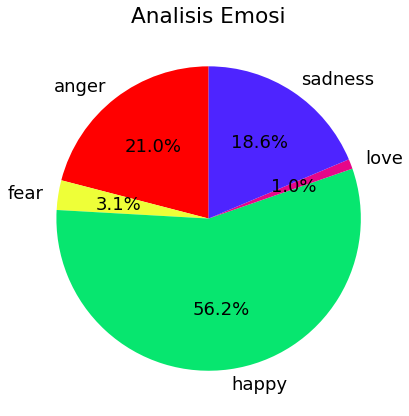

In [ ]:
colors = ['#ff0000','#eeff38','#07e66f','#e60789','#4e24ff']

piechart2 = df.groupby(["emotion"])["date"].count().plot.pie(autopct="%.1f%%", figsize=(7,7), colors=colors, startangle=90) 
piechart2.set_title('Analisis Emosi')
piechart2.yaxis.set_visible(False)

In [ ]:
piechart2.figure.savefig("/content/drive/Shareddrives/Kementerian Analisis Data Digital/DigiScope/6 IKN/code/EmotionalAnalysis.png")